**DATA PROCESSING**

In [1]:
#all libraries
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn import model_selection
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from collections import Counter
from sklearn.metrics import confusion_matrix
import sklearn.datasets as datasets
from sklearn.metrics import classification_report as report
from sklearn.datasets import make_classification
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


In [2]:
#readings data and labelling colums
cnames=["Chemical_formula","A","B","In_literature","Valence_A","Valence_B","Radius_A_angs","Radius_B_angs","Lowest_distortion","Formation_energy_eVperatom","Stability_eV_per_atom","Magnetic_moment_mu_B","Volume_per_atom_A_cube_per_atom","Band_gap_eV","a_angs","b_angs","c_angs","alpha_deg","beta_deg","gamma_deg","Vacancy_energy_eV_per_O_atom"]
df = pd.read_csv("data.csv",names=cnames)


In [3]:
#removing faulty data and replacing strings with a esier convetion
df.drop(df.index[(df["Valence_B"] == "5")],axis=0,inplace=True)
df.drop(df.index[(df["Valence_A"] == "5")],axis=0,inplace=True)
df.drop(df.index[(df["Valence_B"] == "4")],axis=0,inplace=True)
df.drop(df.index[(df["Valence_A"] == "4")],axis=0,inplace=True)
df.drop(df.index[(df["Valence_A"] == "element not in BV")],axis=0,inplace=True)
df.drop(df.index[(df["Valence_B"] == "element not in BV")],axis=0,inplace=True)
df.drop(df.index[(df["Vacancy_energy_eV_per_O_atom"] =="-")],axis=0,inplace=True)
df['Valence_A'] = df['Valence_A'].replace(['not balanced'], '0') 
df['Valence_A'] = df['Valence_A'].replace(['3'], '1') 
df['Valence_B'] = df['Valence_B'].replace(['not balanced'], '0') 
df['Valence_B'] = df['Valence_B'].replace(['3'], '1') 
df['Lowest_distortion'] = df['Lowest_distortion'].replace(['cubic'], '0') 
df['Lowest_distortion'] = df['Lowest_distortion'].replace(['orthorhombic'], '1')
df['Lowest_distortion'] = df['Lowest_distortion'].replace(['rhombohedral'], '2')
df['Lowest_distortion'] = df['Lowest_distortion'].replace(['tetragonal'], '3')
df['Magnetic_moment_mu_B'] = df['Magnetic_moment_mu_B'].replace(['-'], '0.00')
df['Vacancy_energy_eV_per_O_atom'] = df['Vacancy_energy_eV_per_O_atom'].replace(['-'], '0.00')
df['In_literature'] = df['In_literature'].replace(["FALSE"], '0') 
df['In_literature'] = df['In_literature'].replace(["TRUE"], '1')

In [4]:
df[1:]#printing data

,Chemical_formula,A,B,In_literature,Valence_A,Valence_B,Radius_A_angs,Radius_B_angs,Lowest_distortion,Formation_energy_eVperatom,...,Magnetic_moment_mu_B,Volume_per_atom_A_cube_per_atom,Band_gap_eV,a_angs,b_angs,c_angs,alpha_deg,beta_deg,gamma_deg,Vacancy_energy_eV_per_O_atom
75,Ag2O3,Ag,Ag,0,0,0,1.28,0.95,0,0.351,...,0.00,12.997,0,4.02,4.02,4.02,90,90,90,-2.694
76,AgAlO3,Ag,Al,0,0,0,1.28,0.54,1,-1.51,...,0.00,9.898,0,5.094,5.323,7.3,90,90,90,-1.341
79,AgBO3,Ag,B,0,1,1,0.75,0.27,0,-0.35,...,0.00,8.138,0,3.439,3.439,3.439,90,90,90,-2.641
80,AgBaO3,Ag,Ba,0,0,0,1.28,1.35,1,-0.989,...,0.00,15.631,0.247,6.636,6.739,6.99,90,90,90,-6.975
81,AgBeO3,Ag,Be,0,0,0,1.28,0.45,0,-0.616,...,0.00,8.781,0,3.528,3.528,3.528,90,90,90,-3.058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5322,ZrTmO3,Zr,Tm,0,0,0,0.89,0.96,0,-2.315,...,0.2,14.496,0,4.169,4.169,4.169,90,90,90,-3.645
5326,ZrYO3,Zr,Y,0,0,0,0.89,0.9,0,-2.126,...,0.2,15.277,0,4.243,4.243,4.243,90,90,90,-4.92
5327,ZrYbO3,Zr,Yb,0,0,0,0.89,0.95,1,-3.455,...,0,13.136,4.007,5.558,5.726,8.254,90,90,90,-6.177
5328,ZrZnO3,Zr,Zn,0,0,0,0.89,0.74,0,-1.63,...,0.001,10.804,0,3.78,3.78,3.78,90,90,90,-0.762


In [5]:
#all columns that will be included as a feature
features=["Formation_energy_eVperatom","Stability_eV_per_atom","Magnetic_moment_mu_B","Volume_per_atom_A_cube_per_atom","Band_gap_eV","Vacancy_energy_eV_per_O_atom","Radius_A_angs","Radius_B_angs","Valence_A","Valence_B"]
X = df.loc[1:, features].values
Y = df.loc[1:, "Lowest_distortion"].values


In [6]:
X#printing all instances

array([['0.351', '0.576', '0.00', ..., '0.95', '0', '0'],
       ['-1.51', '0.235', '0.00', ..., '0.54', '0', '0'],
       ['-0.35', '1.074', '0.00', ..., '0.27', '1', '1'],
       ...,
       ['-3.455', '0.205', '0', ..., '0.95', '0', '0'],
       ['-1.63', '1.21', '0.001', ..., '0.74', '0', '0'],
       ['-2.382', '0.906', '0.382', ..., '0.72', '0', '0']], dtype=object)

In [7]:
data="process.csv"
df = pd.read_csv(data)
df = df.fillna(-2)
df.head()


,Shape,formula_pretty,formula_anonymous,volume,density,density_atomic,energy_per_atom,band_gap,efermi,is_gap_direct,is_metal,is_magnetic,ordering,total_magnetization,theoretical
0,0,AlPbO3,ABC3,56.379268,8.311042,11.275854,-6.651740,0.000,6.457979,0,1,0,0,0.032580,1
1,2,Ba2CoMoO6,ABC2D6,277.167172,6.296940,13.858359,-7.604548,1.274,3.062452,1,0,1,2,0.000002,1
2,0,Ba2CoMoO6,ABC2D6,276.766068,6.306065,13.838303,-7.613764,0.000,3.727364,0,1,1,2,0.010982,0
3,4,Ba3HoIrRuO9,ABCD3E9,448.998994,7.501607,14.966633,-7.461055,0.000,3.778487,0,1,1,1,4.000589,1
4,4,Ba3LiOs2O9,AB2C3D9,428.639080,7.309243,14.287969,-7.343171,0.000,3.513875,0,1,1,1,6.011189,0


In [8]:
features=['volume', 'density', 'density_atomic', 'energy_per_atom','band_gap', 'efermi','is_gap_direct', 'is_metal', 'is_magnetic', 'ordering','total_magnetization','theoretical']  
X = df.loc[0:len(df), features].values
Y = df.loc[0:len(df), "Shape"].values

**OVERSAMPLING and Data splitting**

In [9]:
#spliting data into a test and train set with ratio 0.2
X_train, X_test, Y_train, Y_test = model_selection.train_test_split (X, Y, test_size=0.2, random_state=42)
oversample = SMOTE()#oversampling of data
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

In [10]:
for i in range(30000,len(X_train)):
    print(X_train[i][8])

1.0
0.0
1.0
0.0
0.6555313348905439
1.0
0.0
0.0
1.0
1.0
0.0
0.0
1.0
0.7787522370310598
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.44313957575689067
1.0
1.0
1.0
0.2587850691672062
1.0
0.2725421835314732
0.0
1.0
0.0
0.0
1.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
1.0
1.0
0.8456878890035799
1.0
1.0
1.0
0.0
0.0
0.0
1.0
0.4423744197381091
1.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.5199806512356491
1.0
0.0
1.0
0.0
0.9574506618011867
0.0
0.0
1.0
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0
1.0
0.0
0.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.8559151662908746
0.4855766690839207
0.20753436200124442
1.0
1.0
1.0
1.0
0.3730027161904629
1.0
1.0
0.0
1.0
1.0
1.0
1.0
0.0
0.16778688719406787
0.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
1.0
0.0
0.0
1.0
0.0
0.0
0.0
1.0
0.0
1.0
0.7449565917627734
0.0
0.0
0.23897057897732543
1.0
0.0
1.0
1.0
1.0
1.0
0.0
1.0
0.0
0.1418558030010656
0.199551956501394
0.3295155523137455
1.0
0.0
1.0
1.0
1.0
1.0
1.0
0.0
1.0
1.0
0.0
1.0


**FUNCTIONS GLOBAL VARIABLES**

In [11]:
def CRandCM(method,X_test,Y_test):#a function to print classification report and confusion matrix
    Y_pred=method.predict(X_test)
    cr = report(Y_test,  Y_pred)
    cm = confusion_matrix(Y_test, Y_pred)
    print(cr)
    print(cm)

In [12]:
#setting weights so that points which exist in literature has more weight(5), does not exsist in literature has lower weight(1)
#and points produced by SMOTE has least weight(0.5),these weights are hyper parameter,which i have not yet tuned
weights=[]
for i in df["theoretical"]:
    if i=='0':
        weights=np.append(weights,np.array([1]))
    if i=='1':
        weights=np.append(weights,np.array([5]))
    else:
        pass
diff=len(Y_train)-len(weights)#as SMOTE adds adds points only to the end of the Y_train list
for i in range(diff):
    weights=np.append(weights,np.array([0.5]))
weights.shape

(37758,)

**SUPPORT VECTOR MACHINE-LINEAR KERNEL**

In [13]:
#without weights
SVM_linear = svm.SVC(kernel='linear', C=19,random_state=31).fit(X_train, Y_train)
print("Accuracy:",SVM_linear.score(X_test, Y_test))

In [ ]:
CRandCM(SVM_linear,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       331
           1       0.96      0.81      0.88       160
           2       0.41      0.70      0.52        27
           3       0.26      0.70      0.38        10

    accuracy                           0.90       528
   macro avg       0.66      0.79      0.69       528
weighted avg       0.94      0.90      0.91       528

[[317   1   2  11]
 [  2 130  23   5]
 [  0   4  19   4]
 [  0   1   2   7]]


In [ ]:
#weighted
SVM_linear2 = svm.SVC(kernel='linear',C=20)
SVM_linear2.fit(X_train, Y_train, sample_weight=weights)
print("Accuracy:",SVM_linear2.score(X_test,Y_test))

Accuracy: 0.9071969696969697


In [ ]:
CRandCM(SVM_linear2,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       331
           1       0.91      0.85      0.88       160
           2       0.43      0.59      0.50        27
           3       0.39      0.70      0.50        10

    accuracy                           0.91       528
   macro avg       0.68      0.78      0.71       528
weighted avg       0.93      0.91      0.91       528

[[320   3   2   6]
 [  3 136  18   3]
 [  1   8  16   2]
 [  0   2   1   7]]


**SUPPORT VECTOR MACHINE-GAUSSIAN RBF KERNEL**

In [ ]:
#without weights
SVM_rbf = svm.SVC(kernel='rbf', C=19.5,gamma=0.005, probability=True).fit(X_train, Y_train)
print("Accuracy:",SVM_rbf.score(X_test, Y_test))

In [ ]:
CRandCM(SVM_rbf,X_test,Y_test)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       331
           1       0.93      0.86      0.89       160
           2       0.51      0.70      0.59        27
           3       0.22      0.60      0.32        10

    accuracy                           0.91       528
   macro avg       0.67      0.78      0.70       528
weighted avg       0.94      0.91      0.92       528

[[317   1   2  11]
 [  0 137  15   8]
 [  0   6  19   2]
 [  0   3   1   6]]


In [ ]:
#weighted
SVM_rbf2= svm.SVC(kernel='rbf',C=19,gamma=0.01, probability=True)
SVM_rbf2.fit(X_train, Y_train, sample_weight=weights)
print("Accuracy:",SVM_rbf2.score(X_test,Y_test))

Accuracy: 0.928030303030303


In [ ]:
CRandCM(SVM_rbf2,X_test,Y_test)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       331
           1       0.93      0.91      0.92       160
           2       0.59      0.70      0.64        27
           3       0.32      0.60      0.41        10

    accuracy                           0.93       528
   macro avg       0.71      0.79      0.74       528
weighted avg       0.94      0.93      0.93       528

[[319   2   2   8]
 [  1 146  10   3]
 [  0   6  19   2]
 [  0   3   1   6]]


**SUPPORT VECTOR MACHINE-SIGMOID KERNEL**

In [ ]:
#without weights
SVM_sigmoid = svm.SVC(kernel='sigmoid', C=20,random_state=31).fit(X_train, Y_train)
print("Accuracy:",SVM_sigmoid.score(X_test, Y_test))

Accuracy: 0.13068181818181818


In [ ]:
CRandCM(SVM_sigmoid,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.83      0.10      0.18       331
           1       0.64      0.09      0.15       160
           2       0.07      0.52      0.12        27
           3       0.03      0.70      0.05        10

    accuracy                           0.13       528
   macro avg       0.39      0.35      0.13       528
weighted avg       0.72      0.13      0.17       528

[[ 34   6 134 157]
 [  4  14  60  82]
 [  3   1  14   9]
 [  0   1   2   7]]


In [ ]:
#weighted
SVM_sigmoid2= svm.SVC(kernel='sigmoid',C=20,gamma=0.01)
SVM_sigmoid2.fit(X_train, Y_train, sample_weight=weights)
print("Accuracy:",SVM_sigmoid2.score(X_test,Y_test))

Accuracy: 0.17045454545454544


In [ ]:
CRandCM(SVM_sigmoid,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.83      0.10      0.18       331
           1       0.64      0.09      0.15       160
           2       0.07      0.52      0.12        27
           3       0.03      0.70      0.05        10

    accuracy                           0.13       528
   macro avg       0.39      0.35      0.13       528
weighted avg       0.72      0.13      0.17       528

[[ 34   6 134 157]
 [  4  14  60  82]
 [  3   1  14   9]
 [  0   1   2   7]]


**SUPPORT VECTOR MACHINE-POLYNOMIAL KERNEL**

In [ ]:
#without weights
SVM_poly = svm.SVC(kernel ='poly', degree = 5, C=2).fit(X_train, Y_train)
print("Accuracy:",SVM_poly.score(X_test, Y_test))

Accuracy: 0.8977272727272727


In [ ]:
CRandCM(SVM_poly,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       331
           1       0.95      0.84      0.89       160
           2       0.49      0.70      0.58        27
           3       0.22      0.70      0.33        10

    accuracy                           0.90       528
   macro avg       0.66      0.80      0.69       528
weighted avg       0.94      0.90      0.91       528

[[314   1   5  11]
 [  1 134  14  11]
 [  0   5  19   3]
 [  1   1   1   7]]


In [ ]:
#weighted
SVM_poly2= svm.SVC(kernel ='poly', degree = 5,C=2)
SVM_poly2.fit(X_train, Y_train, sample_weight=weights)
print("Accuracy:",SVM_poly2.score(X_test,Y_test))

Accuracy: 0.9128787878787878


In [ ]:
CRandCM(SVM_poly2,X_test,Y_test)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       331
           1       0.93      0.88      0.91       160
           2       0.55      0.63      0.59        27
           3       0.29      0.70      0.41        10

    accuracy                           0.91       528
   macro avg       0.69      0.79      0.72       528
weighted avg       0.93      0.91      0.92       528

[[317   3   3   8]
 [  3 141  10   6]
 [  1   6  17   3]
 [  1   1   1   7]]


-

RBF kernel and polynomial kernel are to better kernels

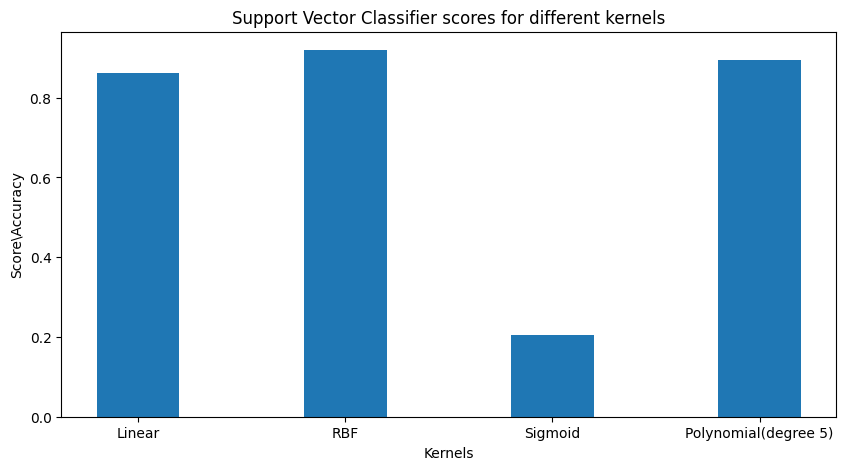

In [ ]:
data={"Linear":0.8614,"RBF":0.9195,"Sigmoid":0.2059,"Polynomial(degree 5)":0.8955}
Kernels = list(data.keys())
Scores = list(data.values())
fig = plt.figure(figsize = (10, 5))

plt.bar(Kernels, Scores ,width = 0.4)
 
plt.xlabel("Kernels")
plt.ylabel("Score\Accuracy")
plt.title("Support Vector Classifier scores for different kernels")
plt.show()

In [ ]:
Y_test[0]

'0'

In [ ]:
c=0
for i in X_test[0]:
    print(type(i))
    if type(i)=="int":
        c+=1
print(c)
print(len(X_test[0]))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
0
10


In [ ]:

from itertools import cycle
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC




In [ ]:
def roc(model,text1):
    y_pred_proba = model.predict_proba(X_test)
    fprs = []
    tprs = []
    roc_auc_scores = []
    for i in range(0, int(Y_train.max())+1):
        y_true_i = (Y_test == i).astype(int)
        fpr, tpr, _ = roc_curve(y_true_i, y_pred_proba[:, i])
        fprs.append(fpr)
        tprs.append(tpr)
        roc_auc_scores.append(roc_auc_score(y_true_i, y_pred_proba[:, i]))

    mean_roc_auc = np.mean(roc_auc_scores)
    plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random Chance', alpha=.8)

    for i in range(0, int(Y_train.max())+1):
        plt.plot(fprs[i], tprs[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc_scores[i]))

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AOC ROC Curve for '+str(text1))
    plt.legend(loc="lower right")
    plt.show()

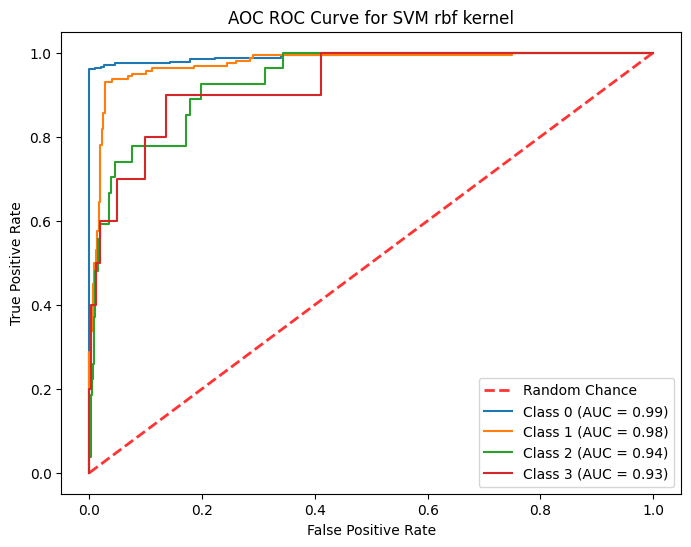

In [ ]:
roc(SVM_rbf,"SVM rbf kernel")

In [ ]:
Y_test

array([0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 3, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 1, 1, 2, 3,
       0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 3, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1,
       0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,

In [ ]:
for i in range (0,len(Y_test)):
    Y_test[i]=int(Y_test[i])


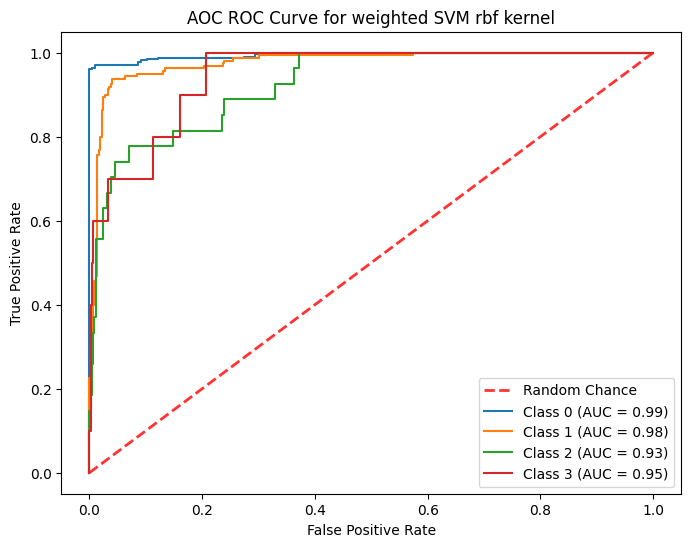

In [ ]:
roc(SVM_rbf2,"weighted SVM rbf kernel")